# Example of Coupled Dictionary Learning with Sparsity

In [1]:
import sys
sys.path.append("../install/lib/python2.7/site-packages") 
import SparseCoupledDL as scDL
import SparseCoupledDL.args as scDLargs
import shlex
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline


In [2]:
plt.rcParams['image.cmap']='jet' #'viridis' before
plt.rcParams.update({
                    'image.cmap':'jet', #'viridis' before
                    'font.weight':'bold',
                    'font.family':'sans-serif',
                    'font.size':'16',
                    'lines.linewidth':'3',
                    'axes.labelsize':'20',
                    'axes.titlesize':'24',
                    'figure.figsize':[24,15]})

# Set data access and Parameters

In [3]:
data_dir="../SparseCoupledDictionaryLearning/datasamples/"

inputhigh=data_dir+"input_hr.csv" #csv file containing the data cubes in high resolution
inputlow=data_dir+"input_lr.csv"  #csv file containing the data cubes in low resolution
dictsize=15                       #size (number of atoms) of the dictionaries that will be calculated
imageN=100                        #size of the input data samples
bands_H=25                        #number of bands in high resolution
bands_L=9                         #number of bands in low resolution
nit=1000                          #number of iterations for calculating the dictionaries
wincost=10                        #window for calculating the RMSE

command_line="--inputhigh {0} --inputlow {1} --dictsize {2} --imageN {3} "\
             "--bands_h {4} --bands_l {5} --n_iter {6} --window {7} -q".format(
            inputhigh,inputlow,dictsize,imageN,
            bands_H,bands_L,nit,wincost)

In [4]:
opts=scDLargs.get_opts(shlex.split(command_line))


# Visualize data

In [5]:
data_h = genfromtxt(opts.inputhigh, delimiter=',')
data_l = genfromtxt(opts.inputlow, delimiter=',')
data_h.shape

(25, 100)

Text(0.5,0,'Band')

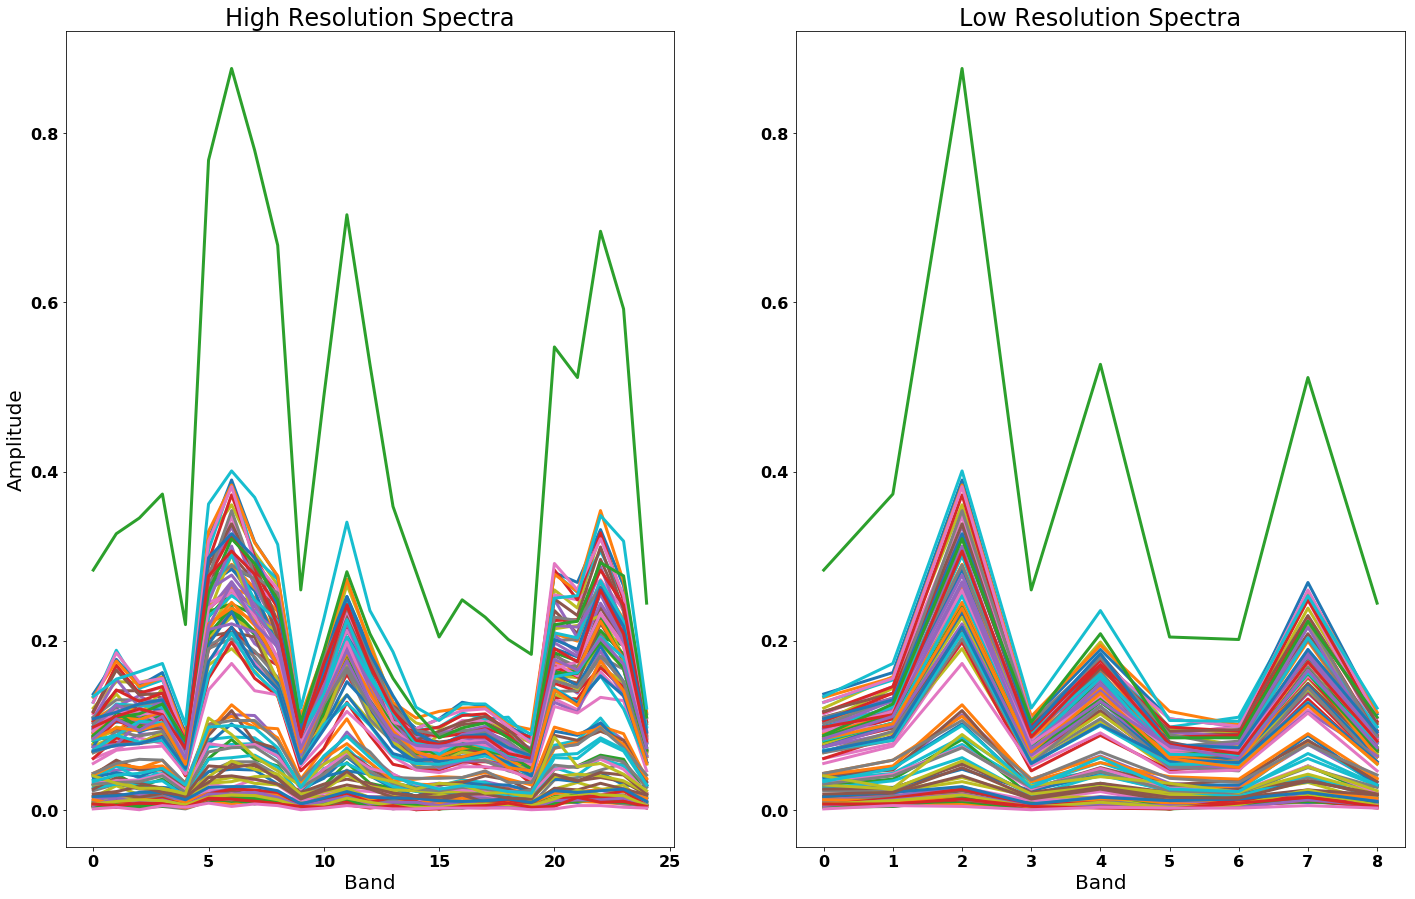

In [6]:
f, axarr = plt.subplots(1, 2)
axarr[0].plot(data_h)
axarr[0].set_title('High Resolution Spectra')
axarr[0].set_xlabel("Band")
axarr[0].set_ylabel("Amplitude")
axarr[1].plot(data_l)
axarr[1].set_title('Low Resolution Spectra')
axarr[1].set_xlabel("Band")




# Learn Coupled Dictionaries

In [7]:
learnt_structure=scDL.run_script(opts)

('ERROR HIGH:', 0.010611771307273749, 'ERROR LOW:', 0.007101837373016292)
Time elapsed for this cost iteration 9: 
0.00449299812317
('ERROR HIGH:', 0.010803405914851162, 'ERROR LOW:', 0.007016857498716903)
Time elapsed for this cost iteration 19: 
0.00432991981506
('ERROR HIGH:', 0.010993404148499211, 'ERROR LOW:', 0.007030911134088688)
Time elapsed for this cost iteration 29: 
0.00432682037354
('ERROR HIGH:', 0.011179879463246455, 'ERROR LOW:', 0.007107404345865714)
Time elapsed for this cost iteration 39: 
0.00426197052002
('ERROR HIGH:', 0.011364686567499963, 'ERROR LOW:', 0.007235762053082713)
Time elapsed for this cost iteration 49: 
0.0042998790741
('ERROR HIGH:', 0.011547446549000558, 'ERROR LOW:', 0.0074065938233234645)
Time elapsed for this cost iteration 59: 
0.00596690177917
('ERROR HIGH:', 0.011732395178557788, 'ERROR LOW:', 0.007613593762181989)
Time elapsed for this cost iteration 69: 
0.00430011749268
('ERROR HIGH:', 0.011919755457198828, 'ERROR LOW:', 0.0078460354596200

('ERROR HIGH:', 0.00864156830917976, 'ERROR LOW:', 0.014253723835390125)
Time elapsed for this cost iteration 649: 
0.00676012039185
('ERROR HIGH:', 0.008526672186429232, 'ERROR LOW:', 0.013718632828306094)
Time elapsed for this cost iteration 659: 
0.00556111335754
('ERROR HIGH:', 0.008423503260042818, 'ERROR LOW:', 0.0131936763823001)
Time elapsed for this cost iteration 669: 
0.00550007820129
('ERROR HIGH:', 0.00833277820376592, 'ERROR LOW:', 0.012680337908180378)
Time elapsed for this cost iteration 679: 
0.00565385818481
('ERROR HIGH:', 0.008255136116248719, 'ERROR LOW:', 0.012182116836826509)
Time elapsed for this cost iteration 689: 
0.00617909431458
('ERROR HIGH:', 0.008191783462494315, 'ERROR LOW:', 0.011696920908824444)
Time elapsed for this cost iteration 699: 
0.00541996955872
('ERROR HIGH:', 0.008143983238003695, 'ERROR LOW:', 0.011222693550026579)
Time elapsed for this cost iteration 709: 
0.00569605827332
('ERROR HIGH:', 0.008111032591641448, 'ERROR LOW:', 0.010759142738

# Display results

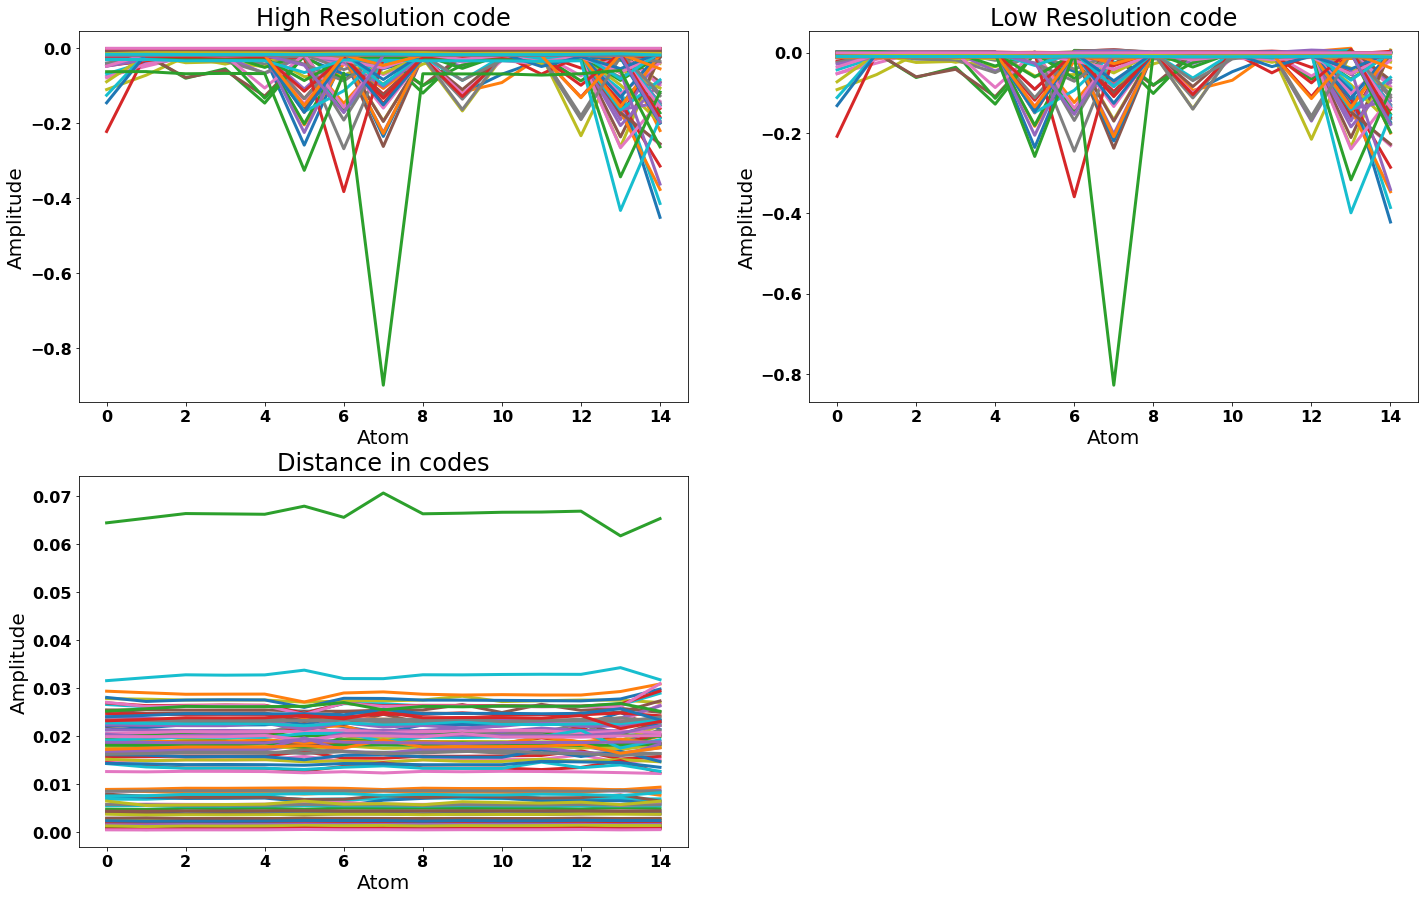

In [8]:
f, axarr = plt.subplots(2,2)
axarr[0,0].plot(learnt_structure["wh"])
axarr[0,0].set_title('High Resolution code')
axarr[0,0].set_xlabel("Atom")
axarr[0,0].set_ylabel("Amplitude")
axarr[0,1].plot(learnt_structure["wl"])
axarr[0,1].set_title('Low Resolution code')
axarr[0,1].set_xlabel("Atom")
axarr[0,1].set_ylabel("Amplitude")
axarr[1,0].plot(np.abs(learnt_structure["wl"]-learnt_structure["wh"]))
axarr[1,0].set_title('Distance in codes')
axarr[1,0].set_xlabel("Atom")
axarr[1,0].set_ylabel("Amplitude")

f.delaxes(axarr[1,1])

### Ensure high res atom mean is positive

In [9]:
for k,col in enumerate(learnt_structure["dicth"].T):
    if(np.mean(col)<0):
        learnt_structure["dicth"][:,k]*=-1
        learnt_structure["wh"][k,:]*=-1
        learnt_structure["dictl"][:,k]*=-1
        learnt_structure["wl"][k,:]*=-1

Text(0,0.5,'Amplitude')

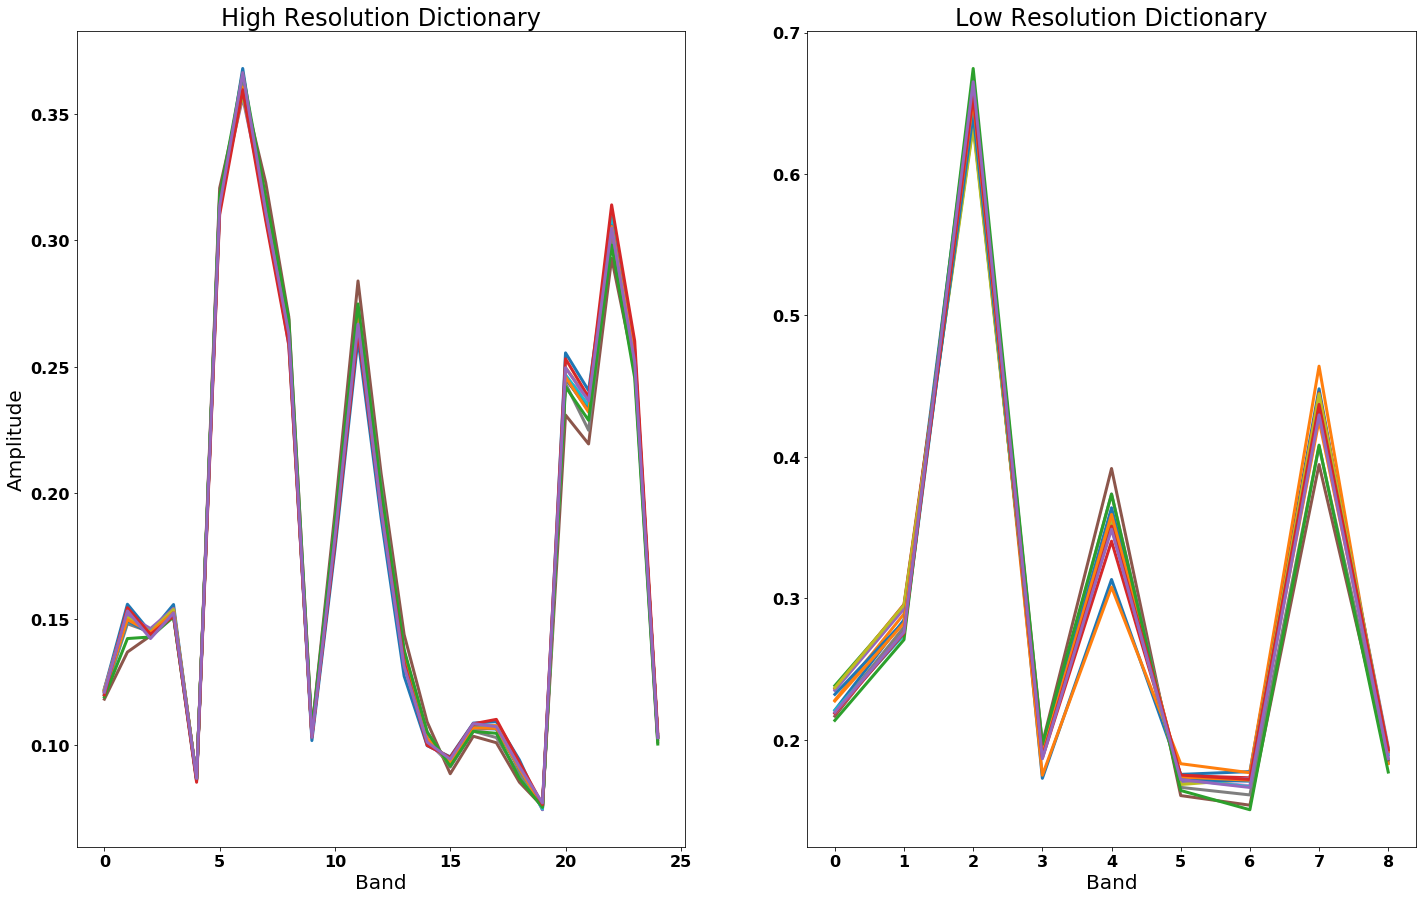

In [10]:
f, axarr = plt.subplots(1, 2)
axarr[0].plot(learnt_structure["dicth"])
axarr[0].set_title('High Resolution Dictionary')
axarr[0].set_xlabel("Band")
axarr[0].set_ylabel("Amplitude")
axarr[1].plot(learnt_structure["dictl"])
axarr[1].set_title('Low Resolution Dictionary')
axarr[1].set_xlabel("Band")
axarr[0].set_ylabel("Amplitude")


